In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('corona(mamgithub).csv')

pd.set_option('display.max_columns',None)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
df.shape

(23688, 5)

# Feature Engineering

In [4]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

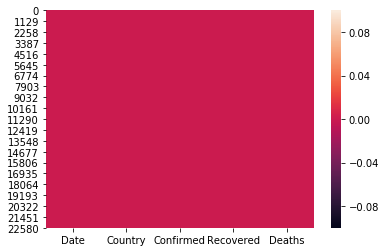

In [5]:
#checking for missing values in the dataset
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [7]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [8]:
#converting Date column to date time format
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [9]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [10]:
#creating new features # instead of adding columns now and later dropping them, you can just exculde them right here
new_df=pd.DataFrame({'year':df['Date'].dt.year,
                     'month':df['Date'].dt.month,
                     'day':df['Date'].dt.day,
                     
#                      'dayofyear':df['Date'].dt.dayofyear,
                     'week':df['Date'].dt.week,           
#                     'dayofweek':df['Date'].dt.dayofweek,
#                     'dayofweekname':df['Date'].dt.weekday_name,
                    'quater':df['Date'].dt.quarter})

In [11]:
df=pd.concat([df,new_df],axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,2020-01-22,Afghanistan,0,0,0,2020,1,22,4,1
1,2020-01-22,Albania,0,0,0,2020,1,22,4,1
2,2020-01-22,Algeria,0,0,0,2020,1,22,4,1
3,2020-01-22,Andorra,0,0,0,2020,1,22,4,1
4,2020-01-22,Angola,0,0,0,2020,1,22,4,1


In [12]:
df.sample(n = 10) # sample randomly shows data 

,Date,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
4820,2020-02-16,Namibia,0,0,0,2020,2,16,7,1
14385,2020-04-07,Lebanon,548,62,19,2020,4,7,15,2
2716,2020-02-05,Israel,0,0,0,2020,2,5,6,1
16541,2020-04-18,Yemen,1,0,0,2020,4,18,16,2
20134,2020-05-08,Benin,242,62,2,2020,5,8,19,2
11403,2020-03-22,New Zealand,102,0,0,2020,3,22,12,1
4154,2020-02-13,Benin,0,0,0,2020,2,13,7,1
6572,2020-02-25,Uzbekistan,0,0,0,2020,2,25,9,1
11382,2020-03-22,Lithuania,143,1,1,2020,3,22,12,1
14141,2020-04-06,Costa Rica,467,18,2,2020,4,6,15,2


# Dropping unnecessary columns 

In [13]:
#dropping the columns from which we have already extracted the data by label encoding technique
df=df.drop(['Date'],axis=1) # you dropped the country
df.head()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,Afghanistan,0,0,0,2020,1,22,4,1
1,Albania,0,0,0,2020,1,22,4,1
2,Algeria,0,0,0,2020,1,22,4,1
3,Andorra,0,0,0,2020,1,22,4,1
4,Angola,0,0,0,2020,1,22,4,1


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])

In [15]:
df.head()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,0,0,0,0,2020,1,22,4,1
1,1,0,0,0,2020,1,22,4,1
2,2,0,0,0,2020,1,22,4,1
3,3,0,0,0,2020,1,22,4,1
4,4,0,0,0,2020,1,22,4,1


In [16]:
#we can see none of the column is highly negatively correlated with the target'Deaths'.no need to drop any columns
#dayofweek is negatively correlated but within range
df.corr()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
Country,1.000000e+00,0.069204,0.019298,0.064954,NaN,-1.068063e-18,-2.078548e-17,1.020574e-17,0.000000
Confirmed,6.920426e-02,1.000000,0.810991,0.929718,NaN,1.408603e-01,5.020675e-03,1.463167e-01,0.137087
Recovered,1.929830e-02,0.810991,1.000000,0.778094,NaN,1.872444e-01,1.122037e-02,1.955464e-01,0.173298
Deaths,6.495418e-02,0.929718,0.778094,1.000000,NaN,1.401759e-01,3.872599e-03,1.453452e-01,0.138090
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-1.068063e-18,0.140860,0.187244,0.140176,NaN,1.000000e+00,-2.378462e-01,9.706873e-01,0.865909
day,-2.078548e-17,0.005021,0.011220,0.003873,NaN,-2.378462e-01,1.000000e+00,-3.815347e-03,-0.143103
week,1.020574e-17,0.146317,0.195546,0.145345,NaN,9.706873e-01,-3.815347e-03,1.000000e+00,0.858745
quater,0.000000e+00,0.137087,0.173298,0.138090,NaN,8.659087e-01,-1.431031e-01,8.587449e-01,1.000000


In [17]:
# I think I am clear now?yes
# do you want to try it your self or want me to solve it for you?i have done the codes.please check down. okay

In [18]:
df.head()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,0,0,0,0,2020,1,22,4,1
1,1,0,0,0,2020,1,22,4,1
2,2,0,0,0,2020,1,22,4,1
3,3,0,0,0,2020,1,22,4,1
4,4,0,0,0,2020,1,22,4,1


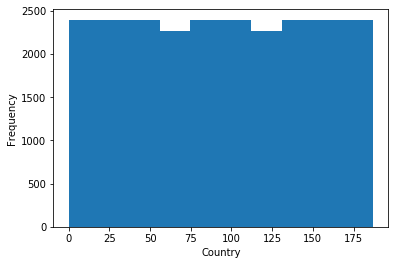

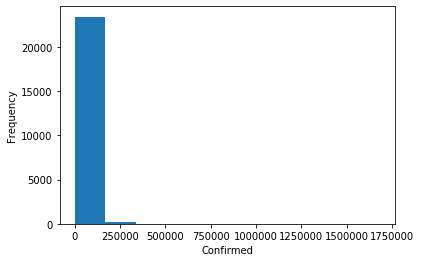

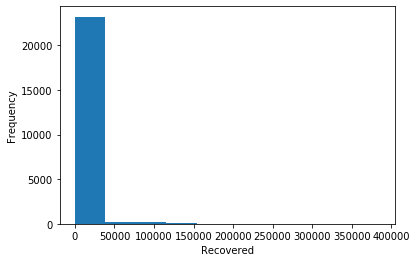

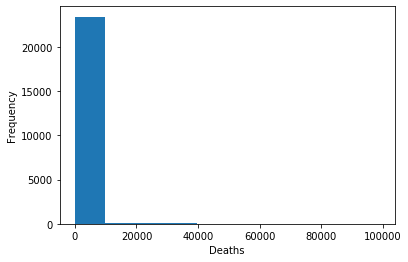

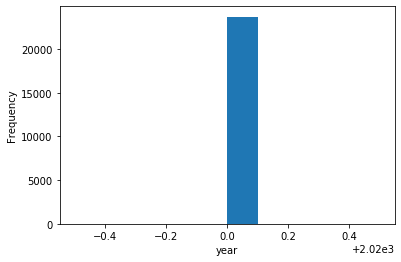

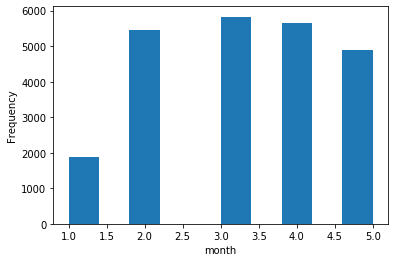

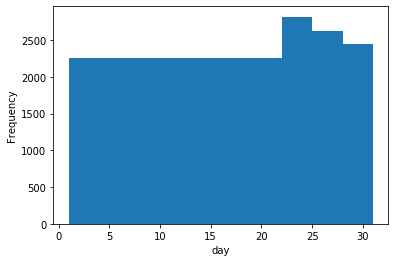

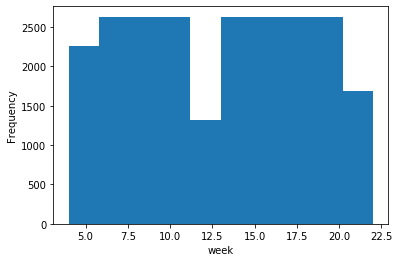

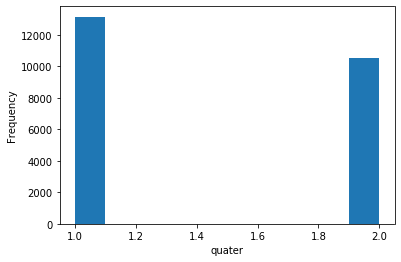

In [19]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.hist()
    plt.xlabel(feature)
    plt.show()

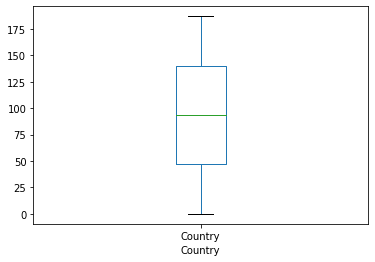

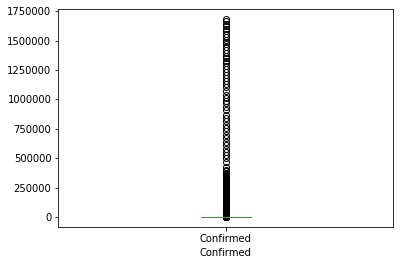

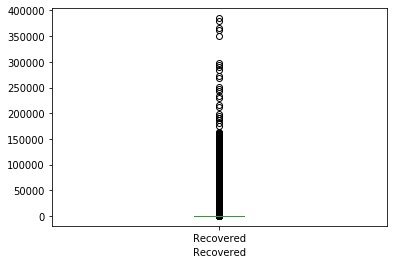

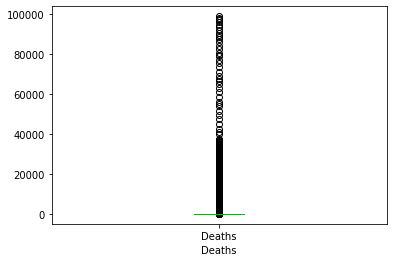

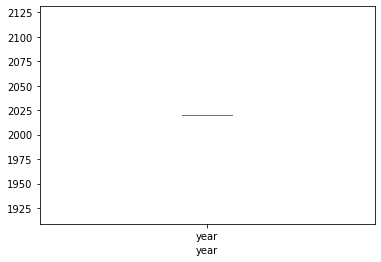

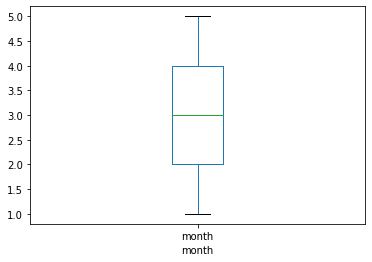

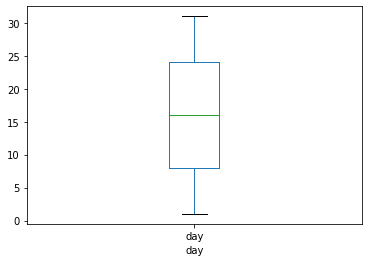

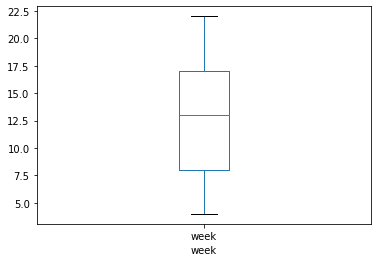

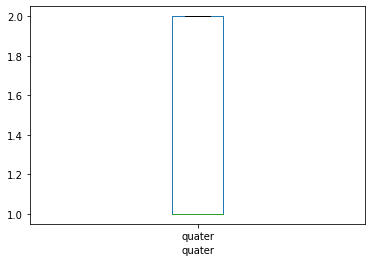

In [20]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

In [21]:
df.head()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,0,0,0,0,2020,1,22,4,1
1,1,0,0,0,2020,1,22,4,1
2,2,0,0,0,2020,1,22,4,1
3,3,0,0,0,2020,1,22,4,1
4,4,0,0,0,2020,1,22,4,1


# yeo johnson method to remove skewness

In [22]:
y=df[['Deaths']]
x=df.drop('Deaths',axis=1)

In [23]:
#checking for skewness
x.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
year          0.000000
month        -0.107605
day          -0.068932
week          0.000619
quater        0.223621
dtype: float64

In [24]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') # initally write code like this so you remember
x_power=pt.fit_transform(x)
x=pd.DataFrame(x_power,columns=x.columns)

In [25]:
x.skew() # can you show me the issue?Deaths.skew > 0.55

Country     -0.278841
Confirmed    0.178414
Recovered    0.412470
year         0.000000
month       -0.112722
day         -0.234208
week        -0.126967
quater       0.223621
dtype: float64

In [26]:
#for col in x:
#    if x.skew().loc[col]>0.55:
#        x[col]=np.log1p(x[col])

    # everything is looking fine, what is the problem exactly?my output is in decimal form, .arre it would be in decimal form as you transformed the target variable as well.
    # leave the target variable out of transformation, it would be just fine.i tried this.some output are negative.
    # it might happen as you might get some miscalculation/errors.ok sir
    #my RMSE score is above 200
    #In doubt clearing video you told to apply some technique.Rmse transformation technique.what is this?
#     okay, RMSE is root mean square error
    

In [27]:
x.head()

,Country,Confirmed,Recovered,year,month,day,week,quater
0,-2.109559,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427
1,-2.052431,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427
2,-2.003294,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427
3,-1.958719,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427
4,-1.917256,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427


In [28]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(x)
x=pd.DataFrame(data=X_scaled,columns=x.columns)


In [29]:
x.head()

,Country,Confirmed,Recovered,year,month,day,week,quater
0,-2.109559,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427
1,-2.052431,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427
2,-2.003294,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427
3,-1.958719,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427
4,-1.917256,-1.125252,-0.931988,0.0,-1.825418,0.708301,-1.800866,-0.894427


# Model building

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [31]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfc=RandomForestRegressor()
xgb=XGBRegressor()

In [32]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfc))
models.append(('XGBRegressor',xgb))

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [34]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
# if your r2 score is high and cross validation is low, this means you are overfitting the data

***************** KNeighborsClassifier *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.7773837503248288


cross_val_score  - -0.09866581411110906


rmse_score  - 2030.487446804635


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - -0.007417862572475897


cross_val_score  - 0.016860459977051302


rmse_score  - 4319.432596629719


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.06598837799246149


cross_val_score  - -30.50195868365435


rmse_score  - 4159.087123419837


***************** DecisionTreeRegressor *******************


DecisionTreeRegre

In [35]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsClassifier,77.738375,2030.487447,-9.866581
1,SVR,-0.741786,4319.432597,1.686046
2,LinearRegression,6.598838,4159.087123,-3050.195868
3,DecisionTreeRegressor,98.619874,505.569885,51.137684
4,GradientBoostingRegressor,98.285818,563.443476,16.214388
5,AdaBoostRegressor,95.081934,954.374997,-72.083204
6,RandomForestRegressor,99.509394,301.431269,74.271222
7,XGBRegressor,99.734990,221.540323,69.258882


# Finding the best random_state for 

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [37]:
xgb=XGBRegressor()
maxr2_score(xgb,x,y)

max_r2_score is at random_state   51   which is   0.9976259682624392


51

# GridSearchCV for

In [38]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
grid_search=gscv.fit(x_train,y_train)
grid_search.best_params_

{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6}

# Saving the Model

In [39]:
#Saving final model of XGBRegressor at random state 50 and best_parameters we got from gridsearchcv
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50)
xgb=XGBRegressor(colsample_bytree=0.9, learning_rate=0.3, max_depth=8)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.9970658291675104
RMSE score=  250.73068144719554


In [40]:
from sklearn.externals import joblib
joblib.dump(xgb,'practiceproject_19.obj')

['practiceproject_19.obj']

In [41]:
model=joblib.load('practiceproject_19.obj')

In [42]:
model.predict(x_test)[:10]

array([ 9.25470428e+01, -1.23566866e-01,  1.14562103e+02,  4.49666452e+00,
        8.73860855e+01,  1.27675537e+03,  2.05826849e-01,  2.75511658e+02,
        7.52134155e+02,  7.55488968e+01], dtype=float32)